# Vi-VQA Dataset - Exploratory Data Analysis

Notebook này phân tích dataset Viet-ViTextVQA-gemini-VQA để hiểu cấu trúc dữ liệu và các đặc điểm.

## 1. Load Dataset từ Hugging Face

In [1]:
import sys
import os

# Add project root to path
sys.path.append(os.path.abspath('..'))

from datasets import load_dataset
from huggingface_hub import login
import json
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image

print('✓ Imports successful')

/home/maidang/projects/Vi-VQA/Vi-VQA/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✓ Imports successful


In [ ]:
import os

# Login to HuggingFace - set HF_TOKEN env variable or use: huggingface-cli login
hf_token = os.environ.get('HF_TOKEN')
if hf_token:
    login(token=hf_token)
else:
    login()  # Will use cached credentials

print('Loading dataset...')
dataset = load_dataset('5CD-AI/Viet-ViTextVQA-gemini-VQA', split='train')

print(f'✓ Dataset loaded!')
print(f'Total samples: {len(dataset)}')
print(f'Columns: {dataset.column_names}')

Loading dataset...
✓ Dataset loaded!
Total samples: 9594
Columns: ['id', 'image', 'description', 'conversations']


## 2. Xem cấu trúc dữ liệu mẫu

In [3]:
# Lấy sample đầu tiên
sample = dataset[0]

print('Sample 0:')
print(f"ID: {sample['id']}")
print(f"\nDescription:\n{sample['description']}")
print(f"\nConversations:")
for i, turn in enumerate(sample['conversations']):
    print(f"  Turn {i+1} - {turn['role']}: {turn['content']}")
print(f"\nImage type: {type(sample['image'])}")
print(f"Image size: {sample['image'].size}")
print(f"Image mode: {sample['image'].mode}")

Sample 0:
ID: 0

Description:
Bức ảnh chụp một tảng đá lớn, được khắc chữ vàng ghi dòng chữ “Sở chỉ huy chiến dịch Điện Biên Phủ 31/1/1954 - 15/5/1954”. Phía dưới dòng chữ tiếng Việt là dòng chữ tiếng Anh “HEADQUATER OF DIEN BIEN PHU CAMPAIGN 31/1/1954 - 15/5/1954”.  Hình ảnh được chụp từ phía trước,  tập trung vào tảng đá, nền là cây xanh. 

Conversations:
  Turn 1 - user: Bức ảnh là di tích gì ?
  Turn 2 - assistant: Bức ảnh là di tích Sở chỉ huy chiến dịch Điện Biên Phủ.
  Turn 3 - user: Thời gian của chiến dịch Điện Biên Phủ ?
  Turn 4 - assistant: Thời gian của chiến dịch Điện Biên Phủ là từ 31 / 1 / 1954 - 15 / 5 / 1954.

Image type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Image size: (960, 1440)
Image mode: RGB


## 3. Hiển thị một vài mẫu hình ảnh

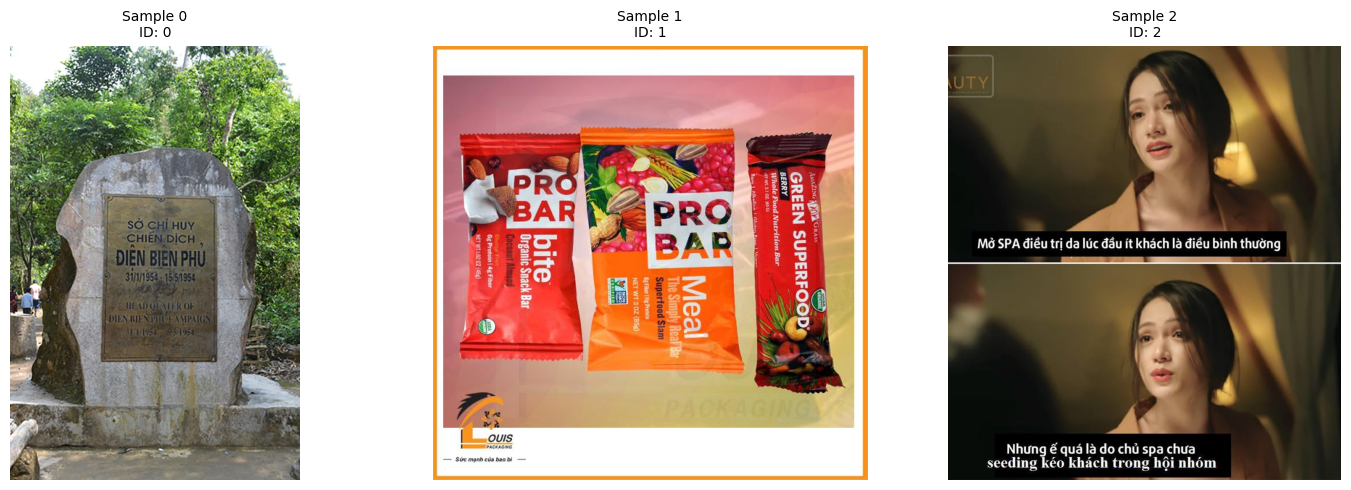

In [4]:
# Hiển thị 3 mẫu đầu tiên
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    sample = dataset[i]
    axes[i].imshow(sample['image'])
    axes[i].set_title(f"Sample {i}\nID: {sample['id']}", fontsize=10)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## 4. Thống kê về Conversations

Số turns trung bình: 6.55
Min turns: 2
Max turns: 46

Số QA pairs trung bình: 3.27
Tổng số QA pairs: 31420


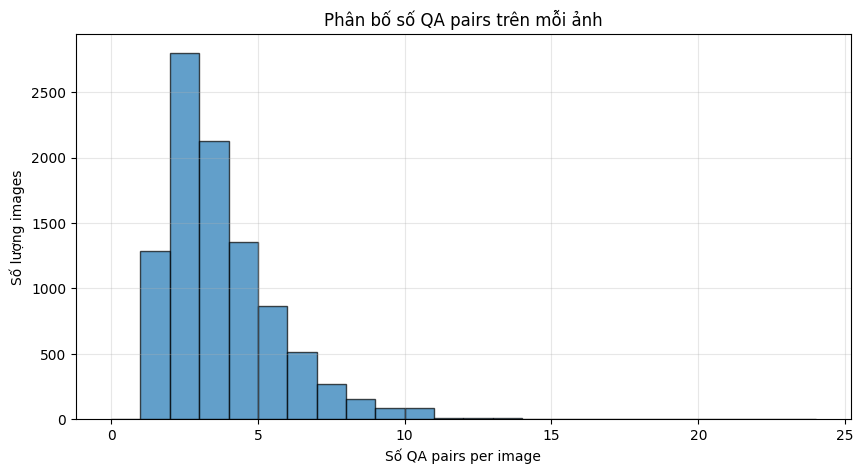

In [5]:
# Đếm số lượng turns trong mỗi conversation
num_turns = [len(item['conversations']) for item in dataset]
num_qa_pairs = [len(item['conversations']) // 2 for item in dataset]  # Mỗi QA pair = 2 turns

print(f"Số turns trung bình: {sum(num_turns) / len(num_turns):.2f}")
print(f"Min turns: {min(num_turns)}")
print(f"Max turns: {max(num_turns)}")
print(f"\nSố QA pairs trung bình: {sum(num_qa_pairs) / len(num_qa_pairs):.2f}")
print(f"Tổng số QA pairs: {sum(num_qa_pairs)}")

# Histogram
plt.figure(figsize=(10, 5))
plt.hist(num_qa_pairs, bins=range(0, max(num_qa_pairs)+2), edgecolor='black', alpha=0.7)
plt.xlabel('Số QA pairs per image')
plt.ylabel('Số lượng images')
plt.title('Phân bố số QA pairs trên mỗi ảnh')
plt.grid(True, alpha=0.3)
plt.show()

## 5. Phân tích độ dài câu hỏi và câu trả lời

Độ dài câu hỏi trung bình: 37.08 ký tự
Độ dài câu trả lời trung bình: 48.97 ký tự


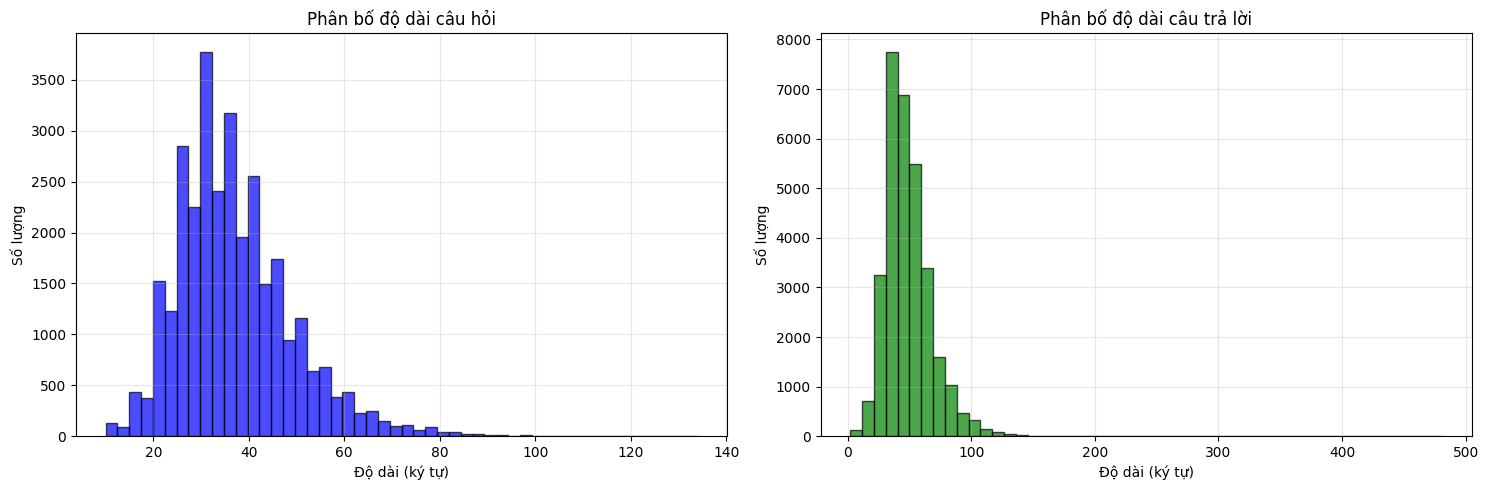

In [6]:
question_lengths = []
answer_lengths = []

for item in dataset:
    convs = item['conversations']
    for i in range(0, len(convs), 2):
        if i < len(convs) and convs[i]['role'] in ['user', 'human']:
            question_lengths.append(len(convs[i]['content']))
        if i+1 < len(convs) and convs[i+1]['role'] in ['assistant', 'gpt']:
            answer_lengths.append(len(convs[i+1]['content']))

print(f"Độ dài câu hỏi trung bình: {sum(question_lengths) / len(question_lengths):.2f} ký tự")
print(f"Độ dài câu trả lời trung bình: {sum(answer_lengths) / len(answer_lengths):.2f} ký tự")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.hist(question_lengths, bins=50, edgecolor='black', alpha=0.7, color='blue')
ax1.set_xlabel('Độ dài (ký tự)')
ax1.set_ylabel('Số lượng')
ax1.set_title('Phân bố độ dài câu hỏi')
ax1.grid(True, alpha=0.3)

ax2.hist(answer_lengths, bins=50, edgecolor='black', alpha=0.7, color='green')
ax2.set_xlabel('Độ dài (ký tự)')
ax2.set_ylabel('Số lượng')
ax2.set_title('Phân bố độ dài câu trả lời')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Thống kê các câu trả lời phổ biến nhất

In [7]:
all_answers = []

for item in dataset:
    convs = item['conversations']
    for turn in convs:
        if turn['role'] in ['assistant', 'gpt']:
            all_answers.append(turn['content'])

answer_counter = Counter(all_answers)

print(f"Tổng số câu trả lời: {len(all_answers)}")
print(f"Số câu trả lời unique: {len(answer_counter)}")
print(f"\nTop 20 câu trả lời phổ biến nhất:")
for i, (answer, count) in enumerate(answer_counter.most_common(20), 1):
    print(f"{i:2d}. ({count:4d}x) {answer[:80]}..." if len(answer) > 80 else f"{i:2d}. ({count:4d}x) {answer}")

Tổng số câu trả lời: 31420
Số câu trả lời unique: 30886

Top 20 câu trả lời phổ biến nhất:
 1. (  14x) Đây là khu chợ.
 2. (   8x) Đây là siêu thị VinMart.
 3. (   7x) Đây là hệ thống siêu thị VinMart.
 4. (   6x) Bức ảnh này chụp ở chợ.
 5. (   6x) Đây là trường Đại học.
 6. (   6x) Sau cuộc chiến tranh 30 năm (1945 - 1975), dân tộc Việt Nam đã chịu những tổn th...
 7. (   5x) Đây là chợ.
 8. (   5x) Chợ này có tên là Chợ Bình Tây.
 9. (   5x) Siêu thị này có tên là VinMart.
10. (   5x) Nơi này được gọi là chợ.
11. (   5x) Cửa hàng này có tên là VinMart.
12. (   4x) Siêu thị đang có chương trình khuyến mãi.
13. (   4x) Đây là phố Tạ Hiện.
14. (   4x) Đây là Bảo tàng Chứng tích Chiến tranh.
15. (   4x) Đây là siêu thị Vinmart.
16. (   4x) Đây là Chợ Bình Tây.
17. (   4x) Chợ này có tên là Chợ Bến Thành.
18. (   4x) Nguồn của bức ảnh này là VTC News.
19. (   4x) Tác giả của cuốn sách này là Nguyễn Nhật Ánh.
20. (   4x) Đây là Chợ Bến Thành.


## 7. Kiểm tra vocabulary size cho classification

Coverage khi lấy top K answers:
  Top   100:  0.95%
  Top   500:  3.29%
  Top  1000:  4.88%
  Top  2000:  8.06%
  Top  5000: 17.61%


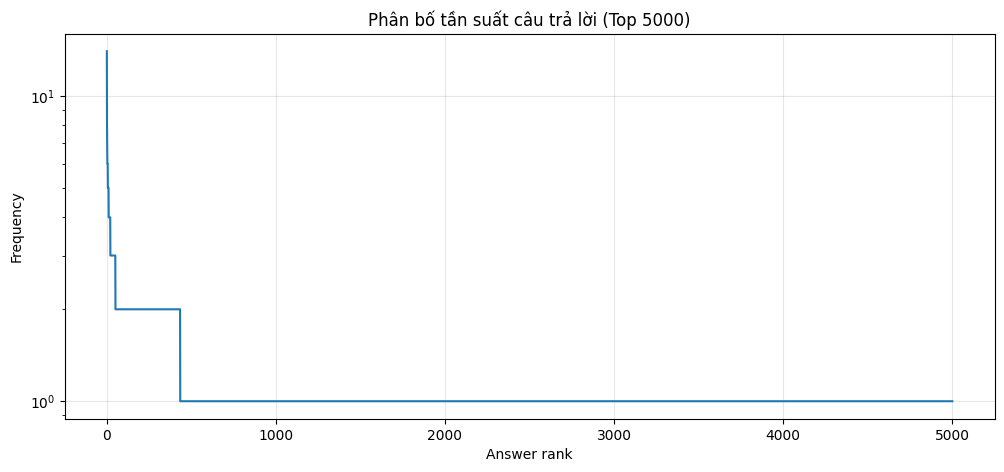

In [8]:
# Xem phân bố tần suất câu trả lời
answer_frequencies = list(answer_counter.values())
answer_frequencies.sort(reverse=True)

# Tính coverage khi lấy top K answers
top_k_values = [100, 500, 1000, 2000, 5000]
total_answers = sum(answer_frequencies)

print("Coverage khi lấy top K answers:")
for k in top_k_values:
    if k <= len(answer_frequencies):
        coverage = sum(answer_frequencies[:k]) / total_answers * 100
        print(f"  Top {k:5d}: {coverage:5.2f}%")

# Plot frequency distribution
plt.figure(figsize=(12, 5))
plt.plot(range(1, min(5001, len(answer_frequencies)+1)), answer_frequencies[:5000])
plt.xlabel('Answer rank')
plt.ylabel('Frequency')
plt.title('Phân bố tần suất câu trả lời (Top 5000)')
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.show()

## 8. Xem một vài mẫu QA pairs với hình ảnh


SAMPLE 0


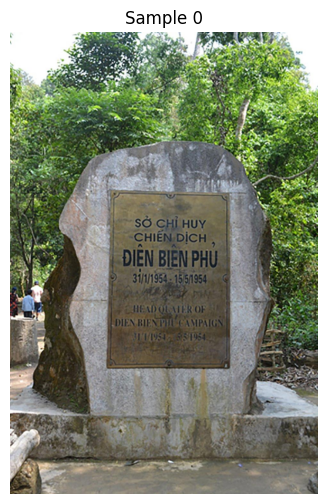


📝 Description:
   Bức ảnh chụp một tảng đá lớn, được khắc chữ vàng ghi dòng chữ “Sở chỉ huy chiến dịch Điện Biên Phủ 31/1/1954 - 15/5/1954”. Phía dưới dòng chữ tiếng Việt là dòng chữ tiếng Anh “HEADQUATER OF DIEN BIEN PHU CAMPAIGN 31/1/1954 - 15/5/1954”.  Hình ảnh được chụp từ phía trước,  tập trung vào tảng đá, nền là cây xanh. 

💬 Conversations:
   Q1: Bức ảnh là di tích gì ?
   A1: Bức ảnh là di tích Sở chỉ huy chiến dịch Điện Biên Phủ.

   Q2: Thời gian của chiến dịch Điện Biên Phủ ?
   A2: Thời gian của chiến dịch Điện Biên Phủ là từ 31 / 1 / 1954 - 15 / 5 / 1954.


SAMPLE 1


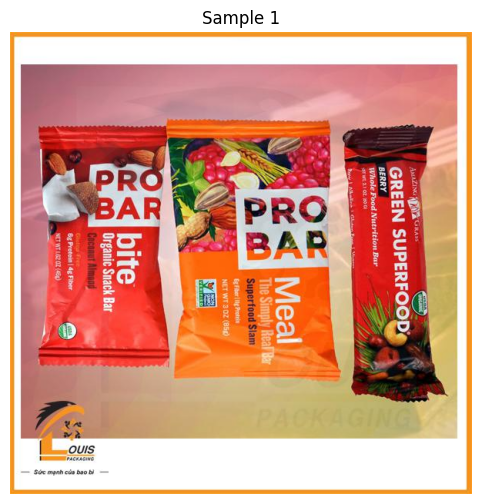


📝 Description:
   Bức ảnh chụp 3 gói kẹo thanh được đặt trên nền trắng. Gói kẹo thanh bên trái có màu đỏ, in chữ "PRO BAR bite" với dòng chữ nhỏ "Organic Snack Bar" ở bên dưới. Gói kẹo thanh ở giữa có màu cam, in chữ "PRO BAR Meal The Simply Real Bar" với dòng chữ nhỏ "Superfood Slam" ở bên dưới. Gói kẹo thanh bên phải có màu đỏ, in chữ "GREEN SUPERFOOD" với dòng chữ nhỏ "BERRY Whole Food Nutrition Bar" ở bên dưới. Dưới cùng của bức ảnh là logo của LOUIS PACKAGING với dòng chữ “Sức mạnh của bao bì”.  

💬 Conversations:
   Q1: Bức ảnh lấy nguồn từ đâu ?
   A1: Bức ảnh lấy nguồn từ LOUIS PACKAGING.

   Q2: Câu slogan của louis là gì ?
   A2: Câu slogan của LOUIS PACKAGING là “Sức mạnh của bao bì”.

   Q3: Bao kẹo màu đỏ bên trái tên gì ?
   A3: Bao kẹo màu đỏ bên trái tên là PRO BAR bite Organic Snack Bar.

   Q4: Bao kẹo màu đỏ bên phải tên gì ?
   A4: Bao kẹo màu đỏ bên phải tên là GREEN SUPERFOOD.


SAMPLE 2


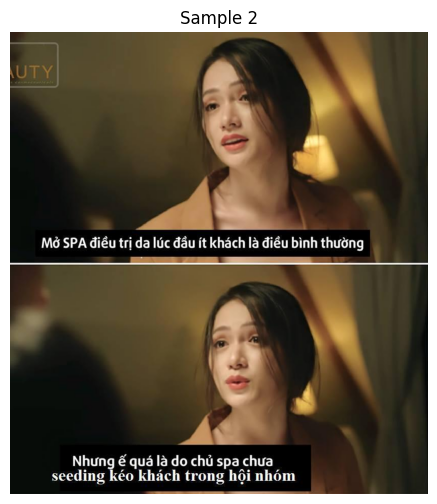


📝 Description:
   Hình ảnh là một đoạn video được cắt ra, chia làm hai khung hình.  Khung hình trên có nội dung: "Mở SPA điều trị da lúc đầu ít khách là điều bình thường". Khung hình dưới có nội dung: "Nhưng ế quá là do Chủ Spa chưa seeding kéo khách trong hội nhóm". Hình ảnh là một người phụ nữ có vẻ ngoài xinh đẹp, mặc áo khoác màu vàng nâu, đang ngồi trong một căn phòng, phía sau có một chiếc đèn ngủ màu vàng. Nét mặt của người phụ nữ thể hiện sự lo lắng, buồn bã.

💬 Conversations:
   Q1: Việc ban đầu ít khách là chuyện như thế nào ?
   A1: Việc ban đầu ít khách là điều bình thường

   Q2: Nếu ế quá thì là do đâu ?
   A2: Nếu ế quá thì là do Chủ Spa chưa seeding kéo khách trong hội nhóm



In [9]:
# Hiển thị 3 mẫu với QA pairs
for idx in range(3):
    sample = dataset[idx]
    
    print(f"\n{'='*80}")
    print(f"SAMPLE {idx}")
    print(f"{'='*80}")
    
    # Display image
    plt.figure(figsize=(6, 6))
    plt.imshow(sample['image'])
    plt.title(f"Sample {idx}")
    plt.axis('off')
    plt.show()
    
    # Display description
    print(f"\n📝 Description:")
    print(f"   {sample['description']}")
    
    # Display QA pairs
    print(f"\n💬 Conversations:")
    convs = sample['conversations']
    for i in range(0, len(convs), 2):
        if i < len(convs):
            print(f"   Q{i//2+1}: {convs[i]['content']}")
        if i+1 < len(convs):
            print(f"   A{i//2+1}: {convs[i+1]['content']}")
            print()

## 9. Phân tích độ dài description

Độ dài description trung bình: 557.75 ký tự
Min: 94
Max: 2057


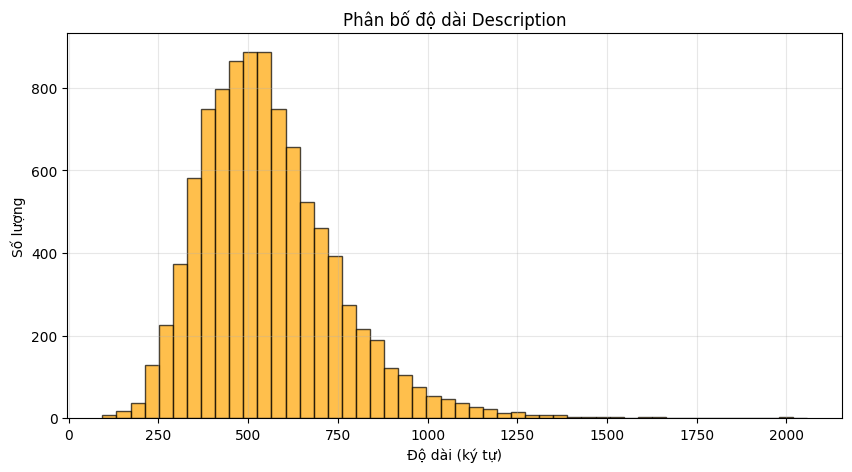

In [10]:
description_lengths = [len(item['description']) for item in dataset]

print(f"Độ dài description trung bình: {sum(description_lengths) / len(description_lengths):.2f} ký tự")
print(f"Min: {min(description_lengths)}")
print(f"Max: {max(description_lengths)}")

plt.figure(figsize=(10, 5))
plt.hist(description_lengths, bins=50, edgecolor='black', alpha=0.7, color='orange')
plt.xlabel('Độ dài (ký tự)')
plt.ylabel('Số lượng')
plt.title('Phân bố độ dài Description')
plt.grid(True, alpha=0.3)
plt.show()